# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [22]:
# TODO: Load the three CSV files into dataframes
# provider_df = pd.read_csv(...)
# facility_df = pd.read_csv(...)
# encounter_df = pd.read_csv(...)
provider_df = pd.read_csv('data/provider_data.csv')
facility_df = pd.read_csv('data/facility_data.csv')
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
# print("Provider data shape:", ...)
# print("Facility data shape:", ...)
# print("Encounter data shape:", ...)
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed
merged_df = pd.merge(encounter_df, provider_df, on='provider_id')
merged_df = merged_df.drop(columns=['facility_id_y'])
merged_df = merged_df.rename(columns={'facility_id_x': 'facility_id'})
merged_df = pd.merge(merged_df, facility_df, on='facility_id')
merged_df = merged_df.drop(columns=['region_y'])
merged_df = merged_df.rename(columns={'region_x': 'region'})

# TODO: Print the merged dataframe shape, columns, and first few rows
# print("\nMerged data shape:", ...)
# print("\nColumns:", ...)
# print("\nFirst few rows:")
# print(...)
print("\nMerged data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns.tolist())
print("\nFirst few rows:")
print(merged_df.head())

Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)

Merged data shape: (5000, 21)

Columns: ['encounter_id', 'patient_id', 'provider_id', 'facility_id', 'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code', 'service_charge', 'insurance_paid', 'patient_paid', 'region', 'provider_name', 'provider_type', 'specialty', 'years_experience', 'license_number', 'facility_name', 'facility_type', 'beds', 'established_date']

First few rows:
  encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encounter_type diagnosis_code  procedure_code  service_charge  \
0          Office Visit  

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [23]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# TODO: Calculate mean, sum, count for years_experience by facility
# TODO: Calculate total encounter charges by facility
# TODO: Calculate total insurance payments by facility
# TODO: Find the facility with highest total encounter charges
grouped = merged_df.groupby('facility_name').agg({
    'years_experience': ['mean', 'sum', 'count'],
    'service_charge': 'sum',
    'insurance_paid': 'sum'
}).sort_values(by=('service_charge', 'sum'), ascending=False).reset_index()
print("Facility with highest total encounter charges: " + grouped.iloc[0,0])
# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
summary_df = merged_df.groupby('facility_name').agg({
    'provider_id': 'nunique',
    'years_experience': 'mean',
    'service_charge': 'sum',
    'insurance_paid': 'sum'
}).reset_index()
summary_df = summary_df.rename(columns={
    'provider_id': 'total_providers',
    'years_experience': 'avg_years_experience',
    'service_charge': 'total_encounter_charge',
    'insurance_paid': 'total_insurance_paid'
})
summary_df.to_csv('output/q1_groupby_analysis.csv', index=False)

Facility with highest total encounter charges: Pediatric Care Center


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [24]:
# TODO: Add facility mean years_experience as new column
# TODO: Add facility standard deviation of years_experience
# TODO: Create normalized years_experience (z-score within facility)
# TODO: Add facility total encounter charges as new column
merged_df['facility_mean_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('mean')
merged_df['facility_std_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('std')
merged_df['normalized_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform(lambda x: (x - x.mean()) / x.std())
merged_df['facility_total_encounter_charges'] = merged_df.groupby('facility_name')['service_charge'].transform('sum')

# TODO: Display the enhanced dataframe
# TODO: Save results as 'output/q1_aggregation_report.txt'
display(merged_df)
with open("output/q1_aggregation_report.txt", "w") as f:
    f.write("Assignment 8 - Question 1\n")
    merged_df.to_csv(f, index=False)

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,facility_mean_years_experience,facility_std_years_experience,normalized_years_experience,facility_total_encounter_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [25]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
# TODO: Filter facilities with average years_experience > 10 (experienced staff)
# TODO: Filter facilities with total encounter charges > 250000 (high volume)
sufficient_staffing = merged_df.groupby('facility_name').filter(lambda x: x['provider_id'].nunique() > 20)
experienced_staff = sufficient_staffing.groupby('facility_name').filter(lambda x: x['years_experience'].mean() > 10)
filtered = experienced_staff.groupby('facility_name').filter(lambda x: x['service_charge'].sum() > 250000)

# TODO: Create a summary of filtered results showing whether each facility meets the criteria
# TODO: Save results as 'output/q2_filter_analysis.csv'
filtered_summary = filtered.groupby('facility_name').agg({
    'provider_id': 'nunique',
    'years_experience': 'mean',
    'service_charge': 'sum'
})

display(filtered_summary)

filtered_summary.to_csv('output/q2_filter_analysis.csv', index=False)


,provider_id,years_experience,service_charge
facility_name,,,
Cardiology Specialty Center,297,19.319728,276658.83
City General Hospital,312,19.563008,295508.13
Community Health Clinic,328,20.160784,334992.21
Emergency Medical Center,299,19.668687,310735.25
Northside Urgent Care,305,20.137014,297283.06
Oncology Treatment Center,324,19.381139,334927.30
Pediatric Care Center,326,19.811676,361811.04
Primary Care Clinic,316,20.102970,323315.71
Regional Medical Center,309,20.209205,316284.98


### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [26]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    stats = {
        'mean_years_experience': group['years_experience'].mean(),
        'std_years_experience': group['years_experience'].std(),
        'min_years_experience': group['years_experience'].min(),
        'max_years_experience': group['years_experience'].max(),
        'range_years_experience': group['years_experience'].max() - group['years_experience'].min()
    }
    return pd.Series(stats)

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    top_n = group.sort_values('encounter_id', ascending=False).head(n)
    return top_n[['provider_id', 'provider_name', 'years_experience', 'specialty']]

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

# TODO: Save results as 'output/q2_performance_report.txt'
with open('output/q2_performance_report.txt', 'w') as f:
    f.write('Assignment 8 - Question 2\n')
    top_providers_by_facility.to_csv(f, index=False)

/var/folders/4l/xd_kd9gd62g2q0x2tmwl8z040000gn/T/ipykernel_36946/2455988214.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [27]:
# TODO: Group by facility type and region
# TODO: Calculate statistics for each facility_type-region combination
# TODO: Use unstack to convert to wide format
# TODO: Use stack to convert back to long format
hierarchical_stats = merged_df.groupby(['facility_type', 'region']).agg({
    'provider_id': 'nunique',
    'years_experience': 'mean',
    'service_charge': 'sum',
    'insurance_paid': 'sum'
})

hierarchical_stats_unstacked = hierarchical_stats.unstack()
print("hierarchical_stats_unstacked, wide format:")
display(hierarchical_stats_unstacked)
hierarchical_stats_stacked = hierarchical_stats_unstacked.stack()
print("hierarchical_stats_stacked, long format:")
display(hierarchical_stats_stacked)

# TODO: Analyze the hierarchical structure
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
print("Wide Hierarchical Dimensions:\n", hierarchical_stats_unstacked.shape)
print("Long Hierarchical Dimensions:\n", hierarchical_stats_stacked.shape)
hierarchical_stats.reset_index().to_csv('output/q2_hierarchical_analysis.csv')


hierarchical_stats_unstacked, wide format:


provider_id               years_experience             \
region                 North  South   West            North      South   
facility_type                                                            
Hospital                 NaN  324.0    NaN              NaN  19.381139   
Specialty Center         NaN  424.0  427.0              NaN  19.742690   
Urgent Care            328.0  430.0  444.0        20.160784  19.881443   

                            service_charge                        \
region                 West          North      South       West   
facility_type                                                      
Hospital                NaN            NaN  334927.30        NaN   
Specialty Center  19.737844            NaN  672546.29  599974.54   
Urgent Care       20.476420      334992.21  611793.11  647192.24   

                 insurance_paid                        
region                    North      South       West  
facility_type                                          
Hospital                    NaN  267183.95        NaN  
Specialty Center            NaN  540230.15  482436.48  
Urgent Care           269207.92  488548.93  515343.09

hierarchical_stats_stacked, long format:


/var/folders/4l/xd_kd9gd62g2q0x2tmwl8z040000gn/T/ipykernel_36946/1156504753.py:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  hierarchical_stats_stacked = hierarchical_stats_unstacked.stack()


provider_id  years_experience  service_charge  \
facility_type    region                                                  
Hospital         South         324.0         19.381139       334927.30   
Specialty Center South         424.0         19.742690       672546.29   
                 West          427.0         19.737844       599974.54   
Urgent Care      North         328.0         20.160784       334992.21   
                 South         430.0         19.881443       611793.11   
                 West          444.0         20.476420       647192.24   

                         insurance_paid  
facility_type    region                  
Hospital         South        267183.95  
Specialty Center South        540230.15  
                 West         482436.48  
Urgent Care      North        269207.92  
                 South        488548.93  
                 West         515343.09

Wide Hierarchical Dimensions:
 (3, 12)
Long Hierarchical Dimensions:
 (6, 4)


## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [28]:
# TODO: Create pivot table: encounter charges by procedure code and region
# TODO: Create pivot table with multiple aggregations (sum, mean, count)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value
pivot1 = pd.pivot_table(
    merged_df,
    values = 'service_charge',
    index = 'procedure_code',
    columns = 'region',
    aggfunc = 'sum'
)
display(pivot1)

pivot2 = pd.pivot_table(
    merged_df,
    values = 'service_charge',
    index = 'procedure_code',
    columns = 'region',
    aggfunc = ['sum', 'mean', 'count'],
    margins = True,
    fill_value = 0
)

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot2.to_csv('output/q3_pivot_analysis.csv')

region,North,South,West
procedure_code,,,
36415,12130.35,57836.97,48458.05
70450,90236.85,375893.20,312204.53
70551,52844.83,234817.26,160891.32
72040,11463.33,81039.58,56599.39
80053,14798.09,83849.78,58540.39
85025,8946.57,48989.64,40769.13
93000,6743.28,55873.35,45845.38
99213,62143.42,327262.66,259242.79
99214,71684.08,322532.05,240095.41


### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [29]:
# TODO: Create crosstab of facility type vs region with counts
# TODO: Create crosstab with margins (row and column totals)
# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
cross_tab = pd.crosstab(
    [merged_df['facility_type'], merged_df['region']],
    merged_df['encounter_type']
)

facility_x_region = pd.crosstab(
    merged_df['facility_type'],
    merged_df['region'],
    margins=True
)
print("========facility_x_region========")
display(facility_x_region)

multi_dim_crosstab = pd.crosstab(
    [merged_df['facility_type'], merged_df['region']],
    merged_df['encounter_type'],
    margins=True
)
print("========multi_dim_crosstab========")
display(multi_dim_crosstab)

# TODO: Analyze the cross-tabulation results
# Hospital only has it facility in the south region. Specialty center has it facilities in south and west regions.
# Urgent care has facilities in all regions.
# Every encounter type in specialty center in the south region is particularly high.
# Encounters in the north facility of the Urgent Care are relatively low.

# TODO: Save results as 'output/q3_crosstab_analysis.csv'
multi_dim_crosstab.to_csv('output/q3_crosstab_analysis.csv')


========facility_x_region========


region,North,South,West,All
facility_type,,,,
Hospital,0,509,0,509
Specialty Center,0,1026,946,1972
Urgent Care,510,970,1039,2519
All,510,2505,1985,5000


========multi_dim_crosstab========


encounter_type           Emergency  Inpatient   Lab  Office Visit  \
facility_type    region                                             
Hospital         South         127         95   100            85   
Specialty Center South         236        210   211           175   
                 West          182        191   180           200   
Urgent Care      North         109         90    90           112   
                 South         190        190   229           178   
                 West          195        201   228           200   
All                           1039        977  1038           950   

encounter_type           Outpatient Procedure   All  
facility_type    region                              
Hospital         South                    102   509  
Specialty Center South                    194  1026  
                 West                     193   946  
Urgent Care      North                    109   510  
                 South                    183   970  
                 West                     215  1039  
All                                       996  5000

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

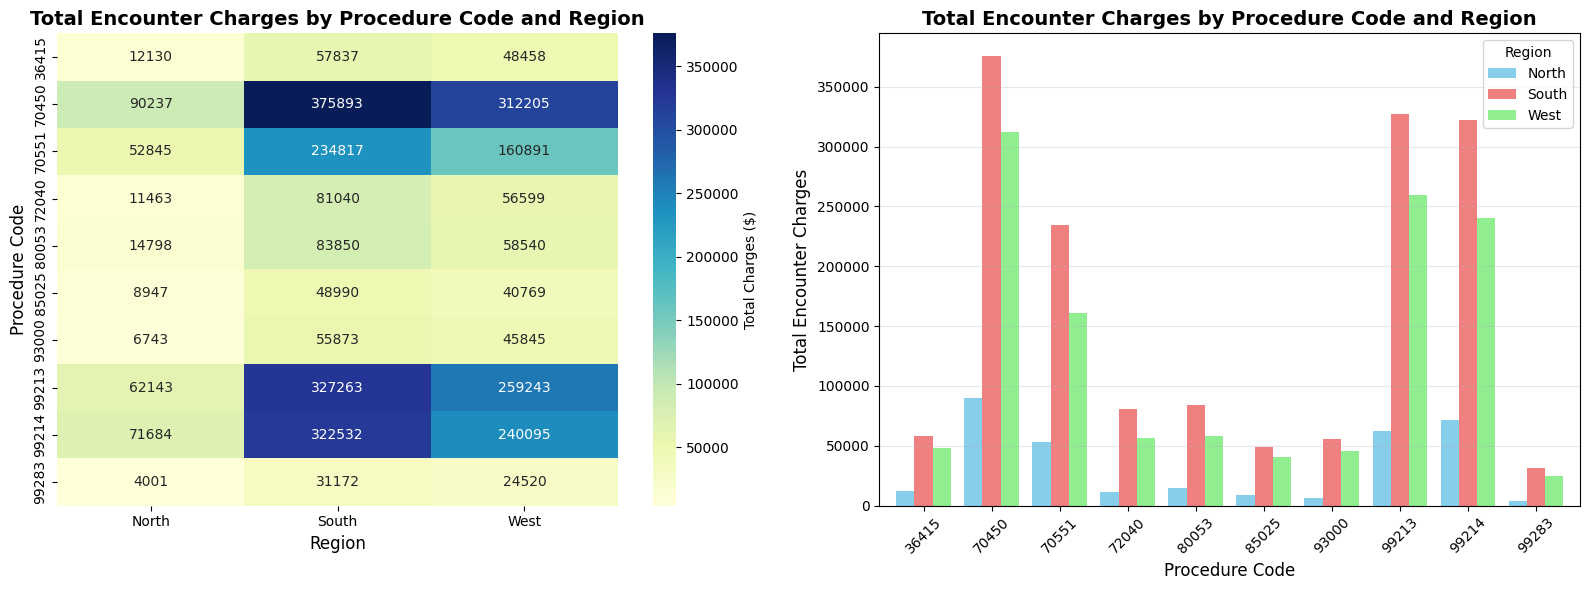

In [30]:
# TODO: Create heatmap from pivot table
# TODO: Create bar chart from pivot table
# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels
# TODO: Save the plot as 'output/q3_pivot_visualization.png'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
sns.heatmap(
    pivot1,
    annot=True, 
    fmt='.0f', 
    cmap='YlGnBu', 
    ax=axes[0],
    cbar_kws={'label': 'Total Charges ($)'}
)
axes[0].set_title('Total Encounter Charges by Procedure Code and Region', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Region', fontsize=12)
axes[0].set_ylabel('Procedure Code', fontsize=12)

# Bar chart
pivot1.plot(kind='bar', ax=axes[1], width=0.8, color=['skyblue', 'lightcoral', 'lightgreen', 'plum'])
axes[1].set_title('Total Encounter Charges by Procedure Code and Region', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Procedure Code', fontsize=12)
axes[1].set_ylabel('Total Encounter Charges', fontsize=12)
axes[1].legend(title='Region', loc='upper right')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('output/q3_pivot_visualization.png')
plt.show()

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques